# Project Overview
This project presents an advsory for ivestment in a film production studio.It provides an insight for new investors to be able to invest in the film sector considering that they have not previous worked in the film sector but they would like to invest in a movie studio.

### Key Questions 
In the analysis of the the data provided,the project will seek to answer the following questions;

Q1. What films are currenlyly being watched with the highest rating?

Q2. which Actors have been featured in a film with a higher or good reveiew?

Q3. Which directors produces the most watched film?




### Importing Libraries
We load the necessary libraries to assist as analyse given data in CSV files and Database available.

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


### Data Description: This is to open and describe the files to be used.

## Reading the CSV file containg the Movie_Gross Incomes

In [6]:
# Opening the CSV file on Movie_Gross
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
# Identify the  inofmration about the dataset of movies_gross incomes.
movie_gross.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Data cleaning: We shall analyse the data on movie_gross income to ascertain missing values and drop the columns with more than 90% of data missing.

In [8]:
# check for missing values for the dataset movies_gross
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
# assess the percentage of missing values from movies_gross
movie_gross.isnull().mean()

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [10]:
# we can also do  check the same thing using the below code;
movie_gross.isna().sum()*100/len(movie_gross)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [11]:
# identify the columns in the dataset movies_gross.
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [12]:
# Get the statistics for the dataset movies_gross
movie_gross.describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [13]:
# droping 90%  of dataset with missing values in the movies_gross dataset
movie_gross_cleaned = movie_gross.dropna(thresh=0.90*len(movie_gross), axis=1)
movie_gross_cleaned


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [14]:
# statistics for the cleaned dataset movies_gross
movie_gross_cleaned.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Reading the CSV file containing data from movies.

In [15]:
# Opening the CSV file on Movies.
movies= pd.read_csv('zippedData/tmdb.movies.csv')
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [16]:
# identify the information about the dataset of movies.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# The data on movies is complete with no missing values.We can use it as it is.

# Reading the CSV file on the  production budget.

In [18]:
# Opening the CSV file on Movies.
movies_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv')
movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
# identify the information about the dataset of movies_budgets.
movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [148]:
# describe the colums of the dataset movies_budgets.
movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Reading the Data base on box office movies.

In [22]:
# Opening the  SQLite file on Movie Ratings
conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()

In [23]:
# Querying the database Movie Ratings
pd.read_sql('SELECT * FROM sqlite_master;', conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


### Solutions to the Key question in the project.

# Question One: What genre  are currently being watched with the highest rating?

In [24]:
# Querying the database Movie Ratings to get top 10 movies with highest ratings
Movie_Ratings= pd.read_sql(
    """ 
SELECT genre_table.genres, AVG(mr.averagerating) AS avg_Rating
FROM (
    SELECT mb.movie_id, TRIM(value) AS genres
    FROM movie_basics mb, 
    json_each('["' || REPLACE(mb.genres, ',', '","') || '"]')
)genre_table 
JOIN movie_ratings mr
ON genre_table.movie_id = mr.movie_id
WHERE averagerating != 10
GROUP BY genres
ORDER BY avg_Rating DESC;
""", conn)
Movie_Ratings.head(10)

,genres,avg_Rating
0,Short,8.800000
1,Documentary,7.330135
2,Game-Show,7.300000
3,News,7.271330
4,Biography,7.162274
5,Music,7.091972
6,History,7.039908
7,Sport,6.961493
8,War,6.584291
9,Reality-TV,6.500000


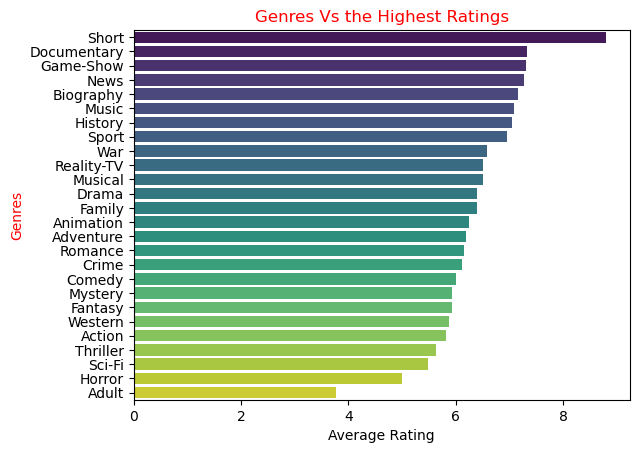

In [150]:
# visualising the data on highest movie ratings
sns.barplot(x='avg_Rating', y='genres', data=Movie_Ratings, palette='viridis')
plt.title('Genres Vs the Highest Ratings').set_color('red')
plt.xlabel('Average Rating')
plt.ylabel('Genres').set_color('red')
plt.show()

* Conclusion: The studio to consider producing movies with genres of 6.5 average-rating and above as follows;
    1. Short
    2. Documentary
    3. Game-Show
    4. News	
    5. Biography
    6. Music
    7. History
    8. Sport
    9. War
    10. Reality-TV

### Question 2: Which Actors have been featured in a film with a higher rating?


In [62]:
Actors_Genres2 = pd.read_sql(
    """ 
SELECT p.category, pe.primary_name, mb.genres, AVG(mr.averagerating) AS average_rating
From principals p
JOIN persons pe
USING(person_id)
JOIN movie_basics mb
USING(movie_id)
JOIN movie_ratings mr
USING(movie_id)
WHERE (category = 'actor' OR category = 'actress') AND numvotes > 500000
GROUP BY primary_name
HAVING average_rating > 8
ORDER BY primary_name
LIMIT 10;
""", conn
)
Actors_Genres2.head(10)

,category,primary_name,genres,average_rating
0,actor,Adrien Brody,"Adventure,Comedy,Crime",8.1
1,actress,Amy Poehler,"Adventure,Animation,Comedy",8.2
2,actress,Anne Hathaway,"Action,Thriller",8.5
3,actress,Anne Le Ny,"Biography,Comedy,Drama",8.5
4,actress,Audrey Fleurot,"Biography,Comedy,Drama",8.5
5,actor,Ben Kingsley,"Mystery,Thriller",8.1
6,actor,Bill Hader,"Adventure,Animation,Comedy",8.2
7,actor,Boyd Holbrook,"Action,Drama,Sci-Fi",8.1
8,actor,Christian Bale,"Action,Thriller",8.4
9,actor,Christoph Waltz,"Drama,Western",8.4


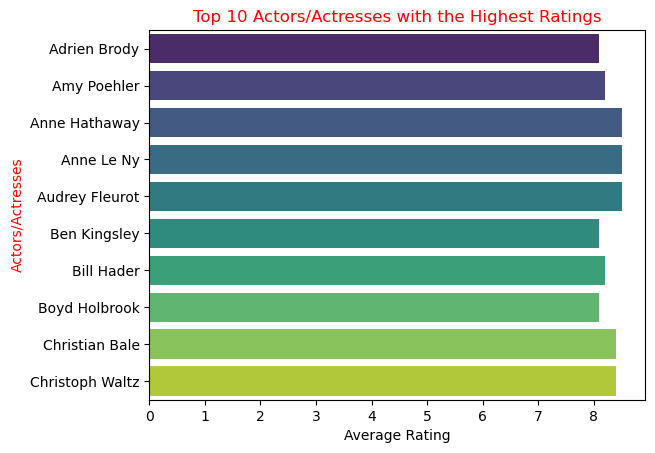

In [152]:
# visualising the data on highest movie ratings
sns.barplot(x='average_rating', y='primary_name', data=Actors_Genres2, palette='viridis')
plt.title('Top 10 Actors/Actresses with the Highest Ratings').set_color('red')
plt.xlabel('Average Rating')
plt.ylabel('Actors/Actresses').set_color('red')
plt.show()

## Conclusion: *Since these actors/actressess have been involved in movies with the highest rating,the producer can consider utilising this actors/actresses to produce their movies.*

### Question 3: Which directors produces the most watched film?

In [160]:
Directors_movies =pd.read_sql(
    """ 
SELECT pr.category, pe.primary_name, AVG(mr.averagerating) AS average_rating, COUNT(person_id) AS number_of_movies
FROM principals pr
JOIN persons pe
USING(person_id)
JOIN movie_ratings mr
USING(movie_id)
WHERE category = 'director'
GROUP BY primary_name
HAVING number_of_movies > 15
ORDER BY average_rating DESC;
""", conn).head(20)
Directors_movies

,category,primary_name,average_rating,number_of_movies
0,director,Phil Grabsky,7.250000,16
1,director,Larry Rosen,7.184000,25
2,director,William Winckler,7.080000,20
3,director,Jason Paul Laxamana,6.912500,16
4,director,Monty Tiwa,6.900000,18
5,director,Cathy Garcia-Molina,6.868750,16
6,director,Hanung Bramantyo,6.745000,20
7,director,Yukihiko Tsutsumi,6.389474,19
8,director,Sion Sono,6.352941,17
9,director,Takashi Miike,6.352632,19


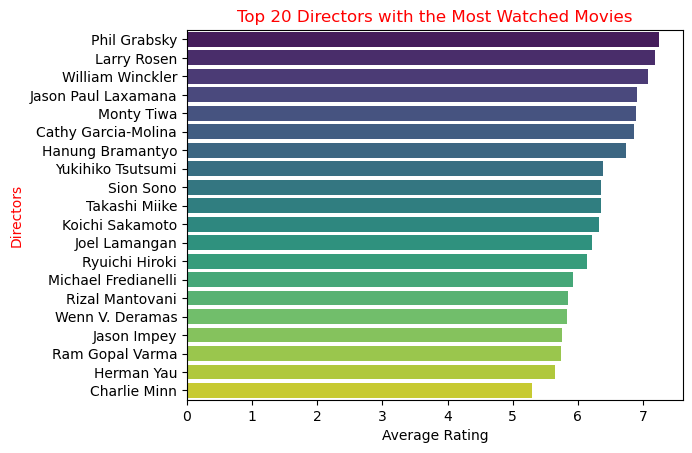

In [161]:
# visualise the directors with the most watched movies and their average ratings    
sns.barplot(x='average_rating', y='primary_name', data=Directors_movies, palette='viridis')
plt.title('Top 20 Directors with the Most Watched Movies').set_color('red')
plt.xlabel('Average Rating')
plt.ylabel('Directors').set_color('red')
plt.show()

### Conclusion: The studio can consider working with this directors during production of movies since they have a higher rating in films.